In [2]:
# Import necessary libraries in this cell

import pandas as pd #pandas is a library for data wrangling/handling
import numpy as np #same case for numpy
import random

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Seaborn / matplotlib for visualization 
import seaborn as sns
# This command tells python to use seaborn for its styling.
sns.set()


# Matplotlib is also a very useful, basic visualization/plotting library
import matplotlib.pyplot as plt
# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline


# Provides z-score helper function,
# z-score uses standard deviation to remove outliers
# (industry standard is if a data point is 3 std devs away from mean,
# it's considered to be an outlier)
import scipy.stats as stats


# Ignore this, this is just for displaying images.
from IPython.display import Image


# Importing sklearn library
import sklearn

# Import the trees from sklearn
from sklearn import tree

# Metrics help us score our model, using metrics to evaluate our model
from sklearn import metrics

# Import our Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Import our Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# This is our Logit model
from sklearn.linear_model import LogisticRegression
# Importing our linear regression model
from sklearn.linear_model import LinearRegression

# Helper fuctions to evaluate our model from sklearn, including f1_score.
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
# Some more helpful ML function
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

# Helper function to split our data for testing and training purposes
from sklearn.model_selection import train_test_split
# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import MultinomaialNB classifier
from sklearn.naive_bayes import MultinomialNB

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC


# Library for visualizing our tree
# If you get an error, 
# run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz 


# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import RegexpTokenizer

# You may need to download these from nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
stopwords = stopwords.words('english')

import pickle

In [29]:
# NAME YOUR MODEL 
filename = 'data1/comments-df.pkl'

## HOW TO LOAD IT FOR FUTURE USE
df = pickle.load(open(filename, 'rb'))

In [30]:
print(df.category.unique())

[1 -1 0]


In [31]:
#Seems like good practice to me, creating a single function that will call all
# our necessary functions from one place, will be subject to change
translator = str.maketrans('', '', string.punctuation)

def text_pipeline(input_str):
    input_str = remove_profanity(input_str)
    return input_str

def mk_lower(a):
    return a.lower()

def remove_stopwords(a):
    return " ".join([word for word in word_tokenize(a) if word not in stopwords])

def remove_sp_char(a):
    ## \s for white space, ^ is negation, \w is words.  so replace all punctutation that follows a word 
    return a.translate(translator)

def remove_sp_char2(a):
    return re.sub(r"[^\w\s]", "", a)
    
    
def text_pipeline2(a):
    a = mk_lower(a)
    a = remove_sp_char(a)
    a = remove_stopwords(a)
    return a

In [32]:
mask1 = df["category"] == -1

df.loc[mask1, 'category'] = 0
print(df["category"].unique())

[1 0]


In [33]:
new_df = pd.DataFrame()
new_df["clean_comment"] = df["clean_comment_profane_free"].copy()
new_df["category"] = df["category"].copy()
new_df.dropna(inplace=True)

print(new_df.shape)

(227016, 2)


In [34]:
print(new_df.columns)
print(new_df.category.unique())
print(new_df.shape)

Index(['clean_comment', 'category'], dtype='object')
[1 0]
(227016, 2)


In [35]:
X = new_df["clean_comment"].values
y = new_df["category"].values
y=y.astype('float')

In [36]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
vectorizer.fit(X)

X = vectorizer.transform(X)

print(X.shape, type(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)


(227016, 4157320) <class 'scipy.sparse.csr.csr_matrix'>


In [37]:
params = {
    'alpha' : [0.45, 0.5, 0.55]
}

grid_search_cv = GridSearchCV(
    estimator = MultinomialNB(),
    param_grid = params,
    scoring = 'accuracy'
)

grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)

model = grid_search_cv.best_estimator_

{'alpha': 0.45}


In [34]:
# # Saving the vectorizer 
# pickle.dump(vectorizer, open('data1/our_vectorizer.pkl', 'wb') )

# # Saving the model
# pickle.dump(model, open('data1/comments_model.pkl', 'wb'))

Model Accuracy: 0.760263


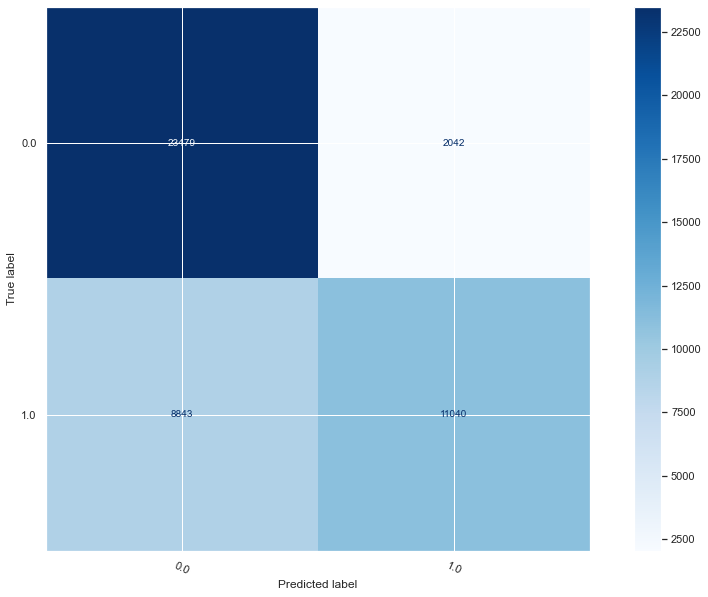

In [38]:
# model = MultinomialNB(alpha=.05)
# model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

fig, ax = plt.subplots(figsize=(16, 10))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)

plt.xticks(rotation=-25)
disp

In [39]:
# # Saving the vectorizer 
pickle.dump(vectorizer, open('data1/vectorizer-ngram3.pkl', 'wb') )

# # Saving the model
pickle.dump(model, open('data1/comments-model-ngram3.pkl', 'wb'))

In [37]:
my_sentences = [
"""hello, my name is kukai and do you want to talk about the one and only god, thighs""",
"""I hate you you should delete your twitter account""",
"""thanks for the recent support.  :)""",
"""imagine being called a CONTENT CREATOR with people donating $5 for everything""",
"cafeteria has new good fries",
" I hate the new cafeteria french fries",
"fuck"
]

for sentence in my_sentences:
    print(sentence)
    # 1. Apply the text pipeline to your sentence
    input_text = text_pipeline2(sentence)
    # 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
    input_vec = vectorizer.transform([input_text])
    # 3. Use the model to predict your new `X`. 
    model.predict(input_vec)
    # 4. Print the prediction
    pp = model.predict_proba(input_vec)
    p_val = []
    for c, p in zip(model.classes_, pp.round(3)[0]):
        p_val.append(p)
        print(c, p)
    if p_val[0] > 0.65:
        print("REJECT")
    elif p_val[1] > 0.65:
        print("ACCEPT")
    else:print("meh, indecisive?")
    

hello, my name is kukai and do you want to talk about the one and only god, thighs
0.0 0.545
1.0 0.455
meh, indecisive?
I hate you you should delete your twitter account
0.0 0.813
1.0 0.187
REJECT
thanks for the recent support.  :)
0.0 0.288
1.0 0.712
ACCEPT
imagine being called a CONTENT CREATOR with people donating $5 for everything
0.0 0.426
1.0 0.574
meh, indecisive?
cafeteria has new good fries
0.0 0.593
1.0 0.407
meh, indecisive?
 I hate the new cafeteria french fries
0.0 0.749
1.0 0.251
REJECT
fuck
0.0 0.554
1.0 0.446
meh, indecisive?


In [43]:
#X is the input

counter = 0
threshold = 100

good_dict = dict()
bad_dict = dict()
indecisive_dict = dict()

good_counter = 0
bad_counter = 0
indecisive_counter = 0

good_examples = []
bad_examples = []
indecisive_examples = []

dataset =  df["clean_comment2"].values

for sentence in dataset:
    counter +=1
    if counter > threshold:
        break
    #print(sentence)
    # 1. Apply the text pipeline to your sentence
    input_text = text_pipeline2(sentence)
    # 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
    input_vec = vectorizer.transform([input_text])
    # 3. Use the model to predict your new `X`. 
    model.predict(input_vec)
    # 4. Print the prediction
    pp = model.predict_proba(input_vec)
    p_val = []
    for c, p in zip(model.classes_, pp.round(3)[0]):
        p_val.append(p)
        #print(c, p)
    if p_val[0] > 0.65:
        #print("REJECT")
        bad_counter+=1
        if bad_counter < 100:
            bad_examples.append(sentence)
        for word in sentence.split():
            bad_dict[word] = bad_dict.get(word, 0) + 1
        
    elif p_val[1] > 0.65:
        #print("ACCEPT")
        good_counter+=1
        if good_counter < 100:
            good_examples.append(sentence)
        for word in sentence.split():
            good_dict[word] = good_dict.get(word, 0) + 1
    else:
        #print("meh, indecisive?")
        indecisive_counter+=1
        if indecisive_counter < 100:
            indecisive_examples.append(sentence)
        for word in sentence.split():
            indecisive_dict[word] = indecisive_dict.get(word, 0) + 1

print("done")

done


In [44]:
examples = random.sample(good_examples, 5)

for texts in examples:
    print(texts)
    print( "*"*20)

dear going difficult keep discussion modi page many glorious commentaries happening mainstream media status improvement gujarat true gujaratis mostly vegetarian spoke guy gurgaon douchey type relocating gujarat mentioned kinda different uncomfortable haryana gujaratis feel state guys gujarati manoos movements
********************
lets talk elephant room regardless media wants think good bad equation hindu muslims gujrat good worsened improved since
********************
many flavours buddhism pure land ideas common however important thing realize really matter big difference compared abrahamic religions buddhism dogmatic sense bunch things must taken literally else non believer sinner whatever maybe pure land ideas work great maybe great works works work useless historical buddha taught dramatically different styles suit audience parables metaphors point take literally believing literally physically true zen koans good example purely distilled form stories stories believe physically hap

In [45]:
examples = random.sample(bad_examples, 5)

for texts in examples:
    print(texts)
    print( "*"*20)

please downvote thread comments interest state leave alone complaining politics please something constructive ask talk state people instead leaving one liner modi messages
********************
geez every single post thread downvoted
********************
impress gujju girl begin
********************
sit together watch simpsons episode lisa becomes buddhist simpsons season episode little faith discuss
********************
homebrew setting primary lawful evil deity named friend lewie essentially three domains tyranny law applied without mercy vengeance community idea cruel harsh god also recognizes catch flies honey vinegar thus church often benevolent toward common people day day basis running gag lewian churches sponsor inner city basketball teams major faith probably want change name might make interesting dynamic within setting
********************


In [46]:
examples = random.sample(indecisive_examples, 5)

for texts in examples:
    print(texts)
    print( "*"*20)

technically could argue sobek evil would represent power also crocodiles whereas also represents fertile land also guy could shapeshift crocodile badass
********************
supposed swap tso branch order basically switch immediately entering crypt clear crypt max tso piety holy brand best weapon case executioners axe post endgame branch order like whatever theres strict order like early game whichever branch feel best prepared avoid meeting terrible fate hands trog wrath book blink soon leave trog train transloc little bit cast whenever surrounds berserking enemies blink middle run staircase teleport keep scrolls blinking hand purpose feel secure also spell trog wrath includes fire miscasts burn shit see trick going lair rat block still viable rat shield thing combos tedious unnecessary case minotaur retaliatory headbutt would kill rat anyway option antimagic axe carry around viable use since strictly one handed train shields use since shield reflection could use really war axes arent

In [47]:
# finding the most frequent words

sorted_good = sorted(good_dict.items(), key=lambda kv: kv[1])
print(type(sorted_good))
print("# of words", len(good_dict))
sorted_good[-20:]

<class 'list'>
# of words 1317


[('way', 10),
 ('god', 10),
 ('something', 10),
 ('time', 11),
 ('like', 11),
 ('jesus', 11),
 ('different', 11),
 ('may', 12),
 ('really', 12),
 ('also', 13),
 ('trog', 13),
 ('mind', 14),
 ('things', 15),
 ('good', 15),
 ('people', 16),
 ('buddhism', 19),
 ('buddha', 19),
 ('one', 21),
 ('pure', 25),
 ('land', 29)]

<AxesSubplot:title={'center':'Most Frequent Words in Good Comments'}, xlabel='Frequency', ylabel='Common_Good_Words'>

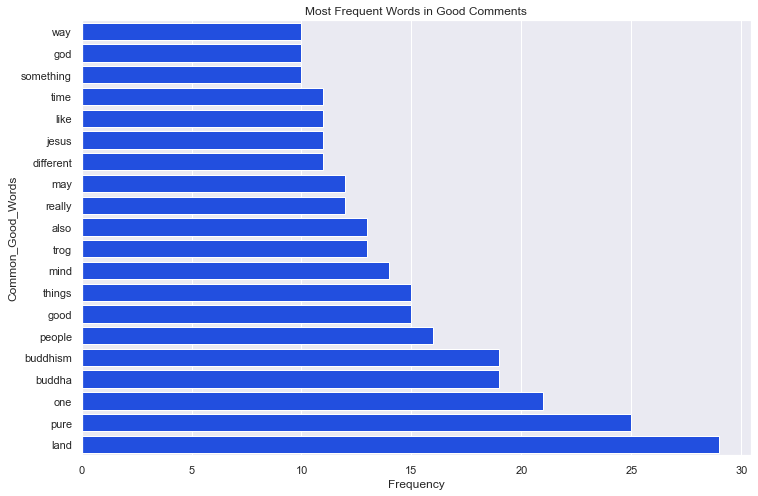

In [115]:
df = pd.DataFrame(sorted_good[-20:], columns = ['Common_Good_Words', 'Frequency'])
# df.head()

fig, ax = plt.subplots(figsize=(12,8))

sns.set_color_codes("bright")
goodplot = sns.barplot(x="Frequency", y="Common_Good_Words", data=df,
             color="b", )
goodplot.set_title("Most Frequent Words in Good Comments")

goodplot

In [49]:
sorted_med = sorted(indecisive_dict.items(), key=lambda kv: kv[1])
print("# of words", len(indecisive_dict))
sorted_med[-20:]

# of words 347


[('day', 3),
 ('tso', 3),
 ('branch', 3),
 ('order', 3),
 ('weapon', 3),
 ('trog', 3),
 ('rat', 3),
 ('state', 3),
 ('modi', 3),
 ('daaru', 3),
 ('also', 4),
 ('suffering', 4),
 ('like', 4),
 ('good', 4),
 ('evil', 5),
 ('god', 5),
 ('get', 5),
 ('shield', 5),
 ('use', 5),
 ('gujarat', 6)]

<AxesSubplot:title={'center':'Most Frequent Words in Indecisive Comments'}, xlabel='Frequency', ylabel='Common_Mid_Words'>

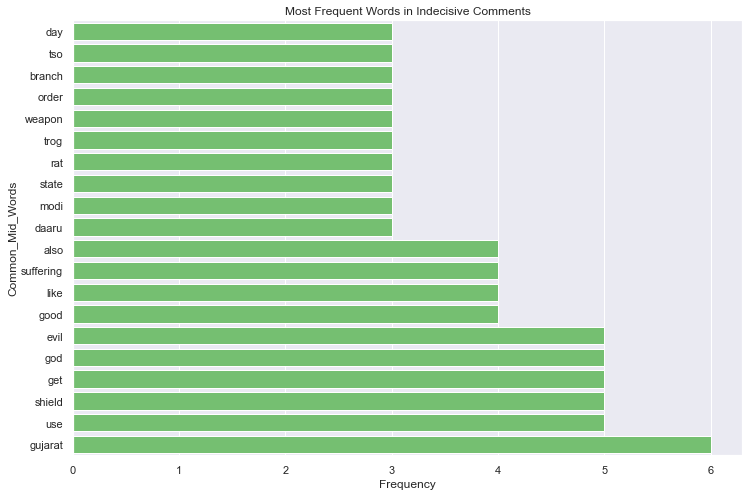

In [116]:
# Creating the barplot for middile words

df = pd.DataFrame(sorted_med[-20:], columns = ['Common_Mid_Words', 'Frequency'])
# df.head()

fig, ax = plt.subplots(figsize=(12,8))

sns.set_color_codes("muted")
midplot = sns.barplot(x="Frequency", y="Common_Mid_Words", data=df,
             color="g", )
midplot.set_title("Most Frequent Words in Indecisive Comments")

midplot


In [50]:
sorted_bad = sorted(bad_dict.items(), key=lambda kv: kv[1])
print("# of words", len(bad_dict))
sorted_bad[-20:]

# of words 525


[('much', 3),
 ('modi', 3),
 ('worst', 3),
 ('part', 3),
 ('least', 3),
 ('biggest', 3),
 ('know', 3),
 ('state', 3),
 ('crazy', 3),
 ('like', 4),
 ('food', 4),
 ('walsh', 4),
 ('even', 4),
 ('want', 5),
 ('party', 5),
 ('gujarat', 5),
 ('evil', 6),
 ('got', 6),
 ('one', 7),
 ('god', 9)]

<AxesSubplot:title={'center':'Most Frequent Words in Bad Comments'}, xlabel='Frequency', ylabel='Common_Bad_Words'>

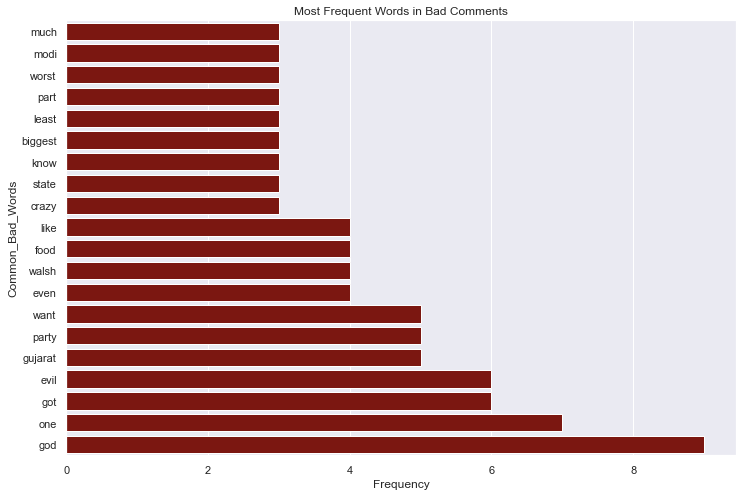

In [117]:
# Creating a bar plot for the sorted_bad words
df = pd.DataFrame(sorted_bad[-20:], columns = ['Common_Bad_Words', 'Frequency'])
# df.head()

fig, ax = plt.subplots(figsize=(12,8))

sns.set_color_codes("dark")
badplot = sns.barplot(x="Frequency", y="Common_Bad_Words", data=df,
             color="r", )
badplot.set_title("Most Frequent Words in Bad Comments")

badplot